In [0]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving framingham.csv to framingham (1).csv


In [0]:
import io
hd = pd.read_csv(io.BytesIO(uploaded['framingham.csv']))
hd.drop(['education'], 
        axis = 1, 
        inplace = True)
hd.dropna(axis = 0, 
          inplace = True)
attrib = hd.iloc[:, :-1]
lab = hd.iloc[:, -1]

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(attrib, lab, 
                                                    test_size = .20, 
                                                    random_state = 0)


In [5]:
from keras import Sequential, regularizers
from keras.layers import Dense, Activation, Dropout
model = Sequential()
model.add(Dense(200, input_dim = 14, 
                kernel_initializer = 'random_uniform', 
                bias_initializer = 'zeros', 
                kernel_regularizer = regularizers.l2(0.01)))
model.add(Activation('relu', name = 'A1'))
model.add(Dense(200, 
                kernel_initializer = 'random_uniform', 
                bias_initializer = 'zeros', 
                kernel_regularizer = regularizers.l2(0.01)))
model.add(Activation('relu', name = 'A2'))
model.add(Dense(1, 
                kernel_initializer = 'random_uniform', 
                bias_initializer = 'zeros',
                kernel_regularizer = regularizers.l2(0.01)))
model.add(Activation('sigmoid'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [6]:
from keras import optimizers
model.compile(optimizer = 'Adam', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               3000      
_________________________________________________________________
A1 (Activation)              (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
A2 (Activation)              (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 43,401
Trainable params: 43,401
Non-trainable params: 0
_________________________________________________________________


In [7]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor = 'val_acc', 
                              factor = 0.5,
                              patience = 1, min_lr = 0.0001)
class_weights = {0: 0.2, 1: 1.0}
history = model.fit(x_train, y_train, 
          validation_split = 0.25, 
          batch_size = 10, 
          epochs = 50,
          verbose = 1,
          callbacks = [reduce_lr],
          class_weight = class_weights)

Instructions for updating:
Use tf.cast instead.
Train on 2250 samples, validate on 750 samples
Epoch 1/50
2250/2250 [==============================] - 2s 875us/step - loss: 0.3091 - acc: 0.5262 - val_loss: 0.2458 - val_acc: 0.7813
Epoch 2/50
2250/2250 [==============================] - 1s 358us/step - loss: 0.2411 - acc: 0.6124 - val_loss: 0.2286 - val_acc: 0.8013
Epoch 3/50
2250/2250 [==============================] - 1s 360us/step - loss: 0.2296 - acc: 0.6013 - val_loss: 0.2276 - val_acc: 0.3800
Epoch 4/50
2250/2250 [==============================] - 1s 348us/step - loss: 0.2220 - acc: 0.6329 - val_loss: 0.2202 - val_acc: 0.7080
Epoch 5/50
2250/2250 [==============================] - 1s 357us/step - loss: 0.2185 - acc: 0.6796 - val_loss: 0.2203 - val_acc: 0.7373
Epoch 6/50
2250/2250 [==============================] - 1s 356us/step - loss: 0.2166 - acc: 0.6680 - val_loss: 0.2199 - val_acc: 0.7133
Epoch 7/50
2250/2250 [==============================] - 1s 353us/step - loss: 0.2161 - ac

In [8]:
val_acc = np.array(history.history['val_acc'])
val_loss = np.array(history.history['val_loss'])
model_acc = np.array(history.history['acc'])
model_loss = np.array(history.history['loss'])
print('Average validation loss:', val_loss.sum()/50)
print('Average validation accuracy:', val_acc.sum()/50)
print('Average loss:', model_loss.sum()/50)
print('Average accuracy:', model_acc.sum()/50)

Average validation loss: 0.21827200586199763
Average validation accuracy: 0.6709600025335948
Average loss: 0.2145703219883972
Average accuracy: 0.6775733354032039


In [9]:
evaluation = model.evaluate(x_train, y_train)
print('Loss:', evaluation[0])
print('Accuracy:', evaluation[1])

3000/3000 [==============================] - 0s 39us/step
Loss: 0.6002515014012655
Accuracy: 0.713333333492279


In [0]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted: 0', 'Predicted: 1'], 
                           index = ['Actual:0', 'Actual:1'])
print('Accuracy:', accuracy_score(y_test, y_pred))
conf_matrix

Accuracy: 0.7097203728362184


,Predicted: 0,Predicted: 1
Actual:0,490,157
Actual:1,61,43


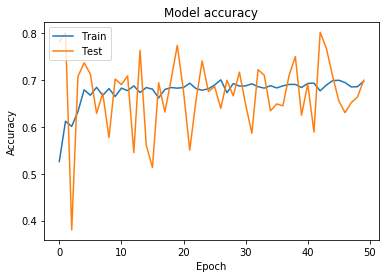

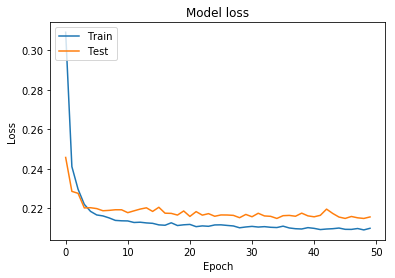

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()